# Explore Public Data Sources

# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from nutritionix import Nutritionix
import requests as req
import json 
import creds

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Explore Nutritionix API Features

## Instantiate Nutritionix Object

In [2]:
# Nutritionix object instance using credentials
nix = Nutritionix(app_id = creds.app_id, api_key = creds.api_key )

## Explore Sample Food Info

In [3]:
# Explore a data sample from the API
food_name = "pizza"
food_details = nix.search(food_name).json()

print("All date keys available:")
print(food_details.keys())
food_detail_hits = food_details['hits']

sample_hit = food_detail_hits[0]
print("\nSample of one item query:")
display(sample_hit)
sample_item_id =  sample_hit['_id']


All date keys available:
dict_keys(['total_hits', 'max_score', 'hits'])

Sample of one item query:


{'_index': 'f762ef22-e660-434f-9071-a10ea6691c27',
 '_type': 'item',
 '_id': '589e292d3a6fbe5b59c92a3f',
 '_score': 12.855445,
 'fields': {'item_id': '589e292d3a6fbe5b59c92a3f',
  'item_name': 'Cheese Pizza - 1 large pizza',
  'brand_name': 'USDA',
  'nf_serving_size_qty': 1,
  'nf_serving_size_unit': 'serving'}}

In [4]:
print("Displaying all the information available for a given item id")
display(nix.item(id=sample_item_id).json())

Displaying all the information available for a given item id


{'old_api_id': None,
 'item_id': '589e292d3a6fbe5b59c92a3f',
 'item_name': 'Cheese Pizza - 1 large pizza',
 'leg_loc_id': 328,
 'brand_id': '513fcc648110a4cafb90ca5e',
 'brand_name': 'USDA',
 'item_description': None,
 'updated_at': '2017-02-10T20:59:34.000Z',
 'nf_ingredient_statement': None,
 'nf_water_grams': None,
 'nf_calories': 2268.98,
 'nf_calories_from_fat': 744.02,
 'nf_total_fat': 82.67,
 'nf_saturated_fat': 38.11,
 'nf_trans_fatty_acid': 2.07,
 'nf_polyunsaturated_fat': 14.35,
 'nf_monounsaturated_fat': 22.24,
 'nf_cholesterol': 145.01,
 'nf_sodium': 5100.94,
 'nf_total_carbohydrate': 284.28,
 'nf_dietary_fiber': 19.61,
 'nf_sugars': 30.53,
 'nf_protein': 97.18,
 'nf_vitamin_a_dv': 61.07,
 'nf_vitamin_c_dv': 19.93,
 'nf_calcium_dv': 160.4,
 'nf_iron_dv': 117.51,
 'nf_refuse_pct': None,
 'nf_servings_per_container': None,
 'nf_serving_size_qty': 1,
 'nf_serving_size_unit': 'large pizza',
 'nf_serving_weight_grams': 853,
 'allergen_contains_milk': None,
 'allergen_contains_eg

In [5]:
# Getting all item keys 
item_fields = list(nix.item(id=sample_item_id).json().keys())
display(item_fields)

['old_api_id',
 'item_id',
 'item_name',
 'leg_loc_id',
 'brand_id',
 'brand_name',
 'item_description',
 'updated_at',
 'nf_ingredient_statement',
 'nf_water_grams',
 'nf_calories',
 'nf_calories_from_fat',
 'nf_total_fat',
 'nf_saturated_fat',
 'nf_trans_fatty_acid',
 'nf_polyunsaturated_fat',
 'nf_monounsaturated_fat',
 'nf_cholesterol',
 'nf_sodium',
 'nf_total_carbohydrate',
 'nf_dietary_fiber',
 'nf_sugars',
 'nf_protein',
 'nf_vitamin_a_dv',
 'nf_vitamin_c_dv',
 'nf_calcium_dv',
 'nf_iron_dv',
 'nf_refuse_pct',
 'nf_servings_per_container',
 'nf_serving_size_qty',
 'nf_serving_size_unit',
 'nf_serving_weight_grams',
 'allergen_contains_milk',
 'allergen_contains_eggs',
 'allergen_contains_fish',
 'allergen_contains_shellfish',
 'allergen_contains_tree_nuts',
 'allergen_contains_peanuts',
 'allergen_contains_wheat',
 'allergen_contains_soybeans',
 'allergen_contains_gluten',
 'usda_fields']

In [6]:
# getting a list of items related to corbohydrates control and allergens 
carb_control_columns =['item_id',
 'item_name',
 'brand_id',
 'brand_name',
 'nf_calories',
 'nf_sodium',
 'nf_total_carbohydrate',
 'nf_total_fat',
 'nf_saturated_fat',
 'nf_trans_fatty_acid',
 'nf_polyunsaturated_fat',
 'nf_monounsaturated_fat',
 'nf_cholesterol',
 'nf_sodium',
 'nf_dietary_fiber',
 'nf_sugars',
 'nf_protein',
 'nf_serving_size_qty',
 'nf_serving_size_unit',
 'nf_serving_weight_grams',
 'allergen_contains_fish',
 'allergen_contains_shellfish',
 'allergen_contains_soybeans',]

## Extracting Data Using Nutritionix API

In [7]:
load_new_data=False
if load_new_data:
    
    list_item_ids= []
    first=0
    step=50

    for iteration in range(200):
        first =iteration*step
        last= first + step - 1
    #     print(first,last)
        temp_items = nix.search(results=f"{first}:{last}").json()
        try:
            list_item_ids.append([x['fields']['item_id'] for x in temp_items['hits']])

        except:
            pass

    item_ids=sum(list_item_ids,[])
    carb_control_items = []
    for item in item_ids: 
        try:
            sample = nix.item(id=item).json()
            if len(set(carb_control_columns).intersection(set(sample.keys()))) == len(set(carb_control_columns)):
                carb_control_items.append(sample)

        except Exception as e:
            print(item)
            print(e)
            pass
        
    all_items_data =pd.DataFrame(carb_control_items) # loading all the extracted data to and pandas dataframe
else: 
    data_file_location = '/home/venkat/Documents/datasets/nutrition_data/nutrinix_data.csv'
    all_items_data =pd.read_csv(data_file_location,index_col=0) # loading data from csv to a pandas dataframe
    
        
        



# Exploring the extracted data

In [8]:
all_items_data.head()

,old_api_id,item_id,item_name,leg_loc_id,brand_id,brand_name,item_description,updated_at,nf_ingredient_statement,nf_water_grams,...,allergen_contains_milk,allergen_contains_eggs,allergen_contains_fish,allergen_contains_shellfish,allergen_contains_tree_nuts,allergen_contains_peanuts,allergen_contains_wheat,allergen_contains_soybeans,allergen_contains_gluten,usda_fields
0,NaN,62178deb2607c900069321ee,Original Flavor Crispy Corn Snacks,NaN,51db37ef176fe9790a89a91a,Bugles,NaN,2022-02-24T13:53:47.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,62178ded2607c900069321f6,Chocolate Chunk & Chip Cookie Dough,NaN,51db37b2176fe9790a898532,Pillsbury,NaN,2022-02-24T13:53:49.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,62178df02607c90006932203,Sea Salt & Cracked Pepper Mashed Potatoes,NaN,58bbba059a3398a676f96e45,Simply Skinny,NaN,2022-03-10T07:10:40.000Z,"POTATOES, SKIM MILK, BUTTER (CREAM, SALT), SEA...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,62178df32607c9000693220b,Mint Moose Tracks Ice Cream,NaN,552aff292a2736f104190307,Signature Select,NaN,2022-02-24T13:53:55.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,62178df52607c90006932213,Peach Pie,2655.0,513fbc1283aa2dc80c0004c5,Marie Callender's,NaN,2022-02-24T13:53:57.000Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from tabulate import tabulate
from IPython.display import display, HTML

# tabulate(all_items_data.info())

pd.DataFrame(all_items_data.info())
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9353 entries, 0 to 9352
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   old_api_id                   1018 non-null   object 
 1   item_id                      9353 non-null   object 
 2   item_name                    9353 non-null   object 
 3   leg_loc_id                   8591 non-null   float64
 4   brand_id                     9353 non-null   object 
 5   brand_name                   9353 non-null   object 
 6   item_description             1660 non-null   object 
 7   updated_at                   9353 non-null   object 
 8   nf_ingredient_statement      109 non-null    object 
 9   nf_water_grams               740 non-null    float64
 10  nf_calories                  9353 non-null   float64
 11  nf_calories_from_fat         6927 non-null   float64
 12  nf_total_fat                 9169 non-null   float64
 13  nf_saturated_fat  

### Marking some unwanted food

In [10]:
# Allergic to Mushroom
all_items_data['contains_mushroom'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('mushroom') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('mushroom') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('mushroom'))

# Religious preference - cannot eat beef
all_items_data['contains_beef'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('beef') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('beef') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('beef'))

# Religious preference - cannot eat beef
all_items_data['contains_steak'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('steak') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('steak') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('steak'))

# dietary preference - cannot eat seafood
all_items_data['contains_sea'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('sea') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('sea') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('sea'))

all_items_data['contains_shell'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('shell') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('shell') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('shell'))


all_items_data['contains_fish'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('fish') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('fish') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('fish'))

# allergic to soy

all_items_data['contains_soy'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('soy') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('soy') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('soy'))

# avoiding alcohol due to pregnancy
all_items_data['contains_alcohol'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('alcohol') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('alcohol') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('alcohol'))

all_items_data['contains_wine'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('wine') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('wine') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('wine'))

all_items_data['contains_rum'] = (all_items_data['item_name'].apply(lambda x:x.lower()).str.contains('rum') | 
                                       all_items_data['item_description'].apply(lambda x:str(x).lower()).str.contains('rum') | 
                                       all_items_data['nf_ingredient_statement'].apply(lambda x:str(x).lower()).str.contains('rum'))


all_items_data['cannot_eat'] =  (all_items_data['contains_mushroom']|
                               all_items_data['contains_beef']|
                               all_items_data['contains_steak']|
                               all_items_data['contains_sea']|
                              all_items_data['contains_shell']|
                              all_items_data['contains_fish']|
                              all_items_data['contains_soy']|
                            all_items_data['contains_alcohol']|
                            all_items_data['contains_wine']|
                            all_items_data['contains_rum']
                             
                              )

## Working With Edible Items

### Dropping columns with sparse data

In [11]:
basic_edible_items=all_items_data.loc[~all_items_data.cannot_eat].dropna(axis=1,thresh=int(all_items_data.shape[0]*0.5))# Dropping columns with NaNs using threshold of 50% of column
basic_edible_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9352
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8599 non-null   object 
 1   item_name              8599 non-null   object 
 2   leg_loc_id             7945 non-null   float64
 3   brand_id               8599 non-null   object 
 4   brand_name             8599 non-null   object 
 5   updated_at             8599 non-null   object 
 6   nf_calories            8599 non-null   float64
 7   nf_calories_from_fat   6320 non-null   float64
 8   nf_total_fat           8426 non-null   float64
 9   nf_saturated_fat       8051 non-null   float64
 10  nf_trans_fatty_acid    7210 non-null   float64
 11  nf_cholesterol         8101 non-null   float64
 12  nf_sodium              8441 non-null   float64
 13  nf_total_carbohydrate  8486 non-null   float64
 14  nf_dietary_fiber       8208 non-null   float64
 15  nf_s

In [12]:
basic_edible_items.describe()

,leg_loc_id,nf_calories,nf_calories_from_fat,nf_total_fat,nf_saturated_fat,nf_trans_fatty_acid,nf_cholesterol,nf_sodium,nf_total_carbohydrate,nf_dietary_fiber,nf_sugars,nf_protein,nf_serving_size_qty
count,7945.000000,8599.000000,6320.000000,8426.000000,8051.000000,7210.000000,8101.000000,8441.000000,8486.000000,8208.00000,8099.000000,8418.000000,8599.000000
mean,3057.231089,440.659420,194.331305,21.485884,7.783328,0.164301,69.789501,825.978095,43.824538,2.47527,20.075006,18.025510,24.654603
std,3626.601292,714.967981,446.399560,46.982730,16.946576,1.010184,168.198870,2174.326249,60.987713,5.56703,34.159309,40.653659,88.469402
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000
25%,328.000000,120.000000,10.000000,1.000000,0.000000,0.000000,0.000000,85.000000,8.000000,0.00000,1.000000,1.000000,1.000000
50%,1100.000000,260.000000,80.000000,9.345000,3.500000,0.000000,20.000000,280.000000,29.000000,1.00000,7.000000,7.000000,1.000000
75%,5619.000000,540.000000,220.000000,25.000000,10.000000,0.000000,75.000000,870.000000,60.000000,3.00000,26.000000,20.000000,3.000000
max,10393.000000,13570.000000,10400.000000,1160.000000,539.000000,52.000000,4505.000000,113173.360000,1121.000000,224.00000,636.000000,752.840000,2268.000000


In [13]:
# Exploring for unit serving 
basic_edible_items['nf_serving_size_qty'].describe(percentiles=np.arange(0,1,0.05)) # About 30% data has values for non-unit serving

count    8599.000000
mean       24.654603
std        88.469402
min         0.050000
0%          0.050000
5%          1.000000
10%         1.000000
15%         1.000000
20%         1.000000
25%         1.000000
30%         1.000000
35%         1.000000
40%         1.000000
45%         1.000000
50%         1.000000
55%         1.000000
60%         1.000000
65%         1.000000
70%         1.000000
75%         3.000000
80%         8.000000
85%        16.000000
90%        28.000000
95%       200.200000
max      2268.000000
Name: nf_serving_size_qty, dtype: float64

### Normalizing data to 1 serving 

In [14]:
overview_columns=['nf_calories','nf_calories_from_fat','nf_total_fat','nf_saturated_fat','nf_cholesterol','nf_total_carbohydrate','nf_dietary_fiber','nf_sugars','nf_protein']
unit_column=[]

for col in overview_columns:
    basic_edible_items[(col.split('_',maxsplit=1)[1])] = basic_edible_items[col]/basic_edible_items['nf_serving_size_qty']
    unit_column.append((col.split('_',maxsplit=1)[1]))

In [15]:
unit_column

['calories',
 'calories_from_fat',
 'total_fat',
 'saturated_fat',
 'cholesterol',
 'total_carbohydrate',
 'dietary_fiber',
 'sugars',
 'protein']

In [16]:
basic_edible_items['nf_serving_size_qty'].describe()

count    8599.000000
mean       24.654603
std        88.469402
min         0.050000
25%         1.000000
50%         1.000000
75%         3.000000
max      2268.000000
Name: nf_serving_size_qty, dtype: float64

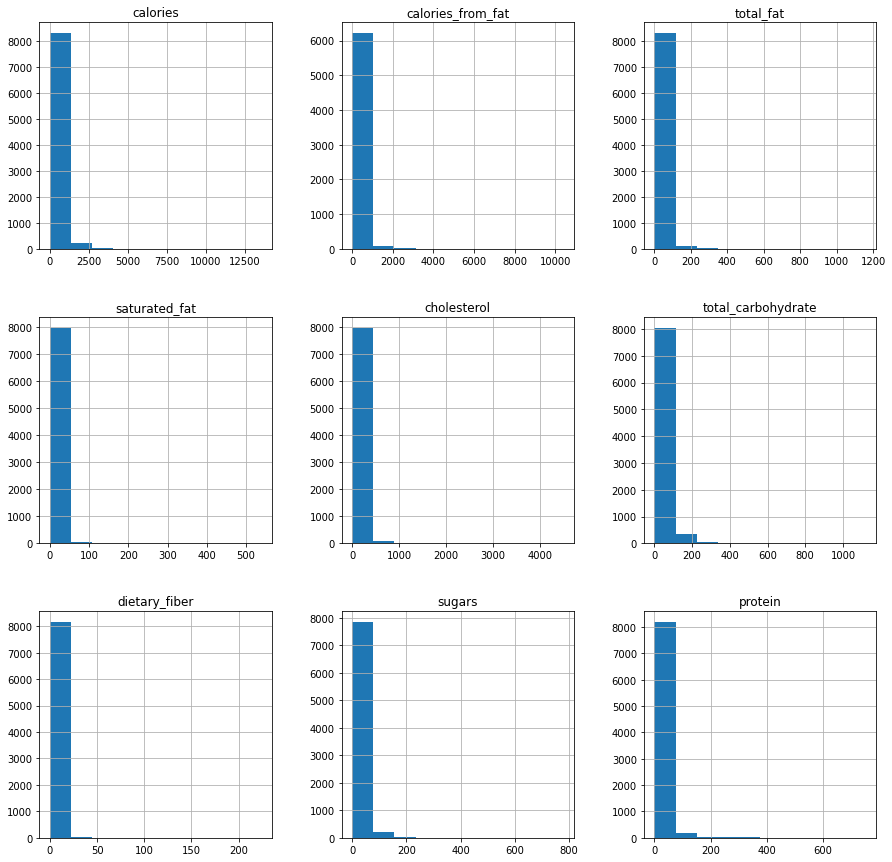

In [17]:
basic_edible_items[unit_column].hist(bins=10,figsize=(15,15))
None

array([[<AxesSubplot:title={'center':'dietary_fiber'}>]], dtype=object)

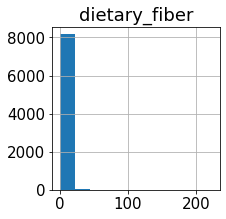

In [77]:
basic_edible_items[['dietary_fiber']].hist(bins=10,figsize=(3,3))

In [59]:
basic_edible_items['calories'].describe(percentiles=np.arange(0,1,0.05))

count     8599.00
mean       337.40
std        618.46
min          0.00
0%           0.00
5%           1.43
10%          2.70
15%          8.75
20%         15.00
25%         25.00
30%         40.00
35%         60.00
40%         85.01
45%        118.01
50%        150.00
55%        194.03
60%        240.00
65%        290.00
70%        360.00
75%        434.91
80%        530.00
85%        657.70
90%        850.00
95%       1180.00
max      13540.00
Name: calories, dtype: float64

### Remove Edge Cases

In [19]:
clean_edible_df=basic_edible_items.copy()[unit_column+['item_id','item_name','brand_name']]

In [20]:
for col in unit_column:
    clean_edible_df[col]=clean_edible_df[(clean_edible_df[col]<clean_edible_df[col].quantile(0.9)*2)&(clean_edible_df[col]>clean_edible_df[col].quantile(0.1)/2)][col].astype(float)

In [21]:
clean_edible_df[unit_column].describe()

,calories,calories_from_fat,total_fat,saturated_fat,cholesterol,total_carbohydrate,dietary_fiber,sugars,protein
count,8029.000000,4870.00000,6490.000000,5729.000000,4973.000000,7594.000000,4562.000000,6423.000000,6722.000000
mean,294.186962,141.19396,15.932868,5.936808,54.476560,29.378569,2.486419,11.533677,13.047752
std,344.124403,175.72803,19.186227,6.871655,64.999727,34.212315,2.615223,16.463645,16.832107
min,1.357143,0.01800,0.001729,0.000924,0.009242,0.067568,0.001211,0.000500,0.001000
25%,35.000000,15.00000,1.875000,0.750000,7.000000,2.816875,0.646371,1.000000,1.000000
50%,160.000000,70.00000,8.000000,3.243243,26.633333,16.000000,1.800000,4.000000,6.000000
75%,430.000000,200.00000,23.000000,9.000000,80.000000,45.000000,4.000000,14.000000,18.000000
max,1690.000000,810.00000,89.120000,31.000000,299.380000,164.000000,11.940299,79.000000,79.000000


In [22]:
clean_edible_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9352
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   calories            8029 non-null   float64
 1   calories_from_fat   4870 non-null   float64
 2   total_fat           6490 non-null   float64
 3   saturated_fat       5729 non-null   float64
 4   cholesterol         4973 non-null   float64
 5   total_carbohydrate  7594 non-null   float64
 6   dietary_fiber       4562 non-null   float64
 7   sugars              6423 non-null   float64
 8   protein             6722 non-null   float64
 9   item_id             8599 non-null   object 
 10  item_name           8599 non-null   object 
 11  brand_name          8599 non-null   object 
dtypes: float64(9), object(3)
memory usage: 873.3+ KB


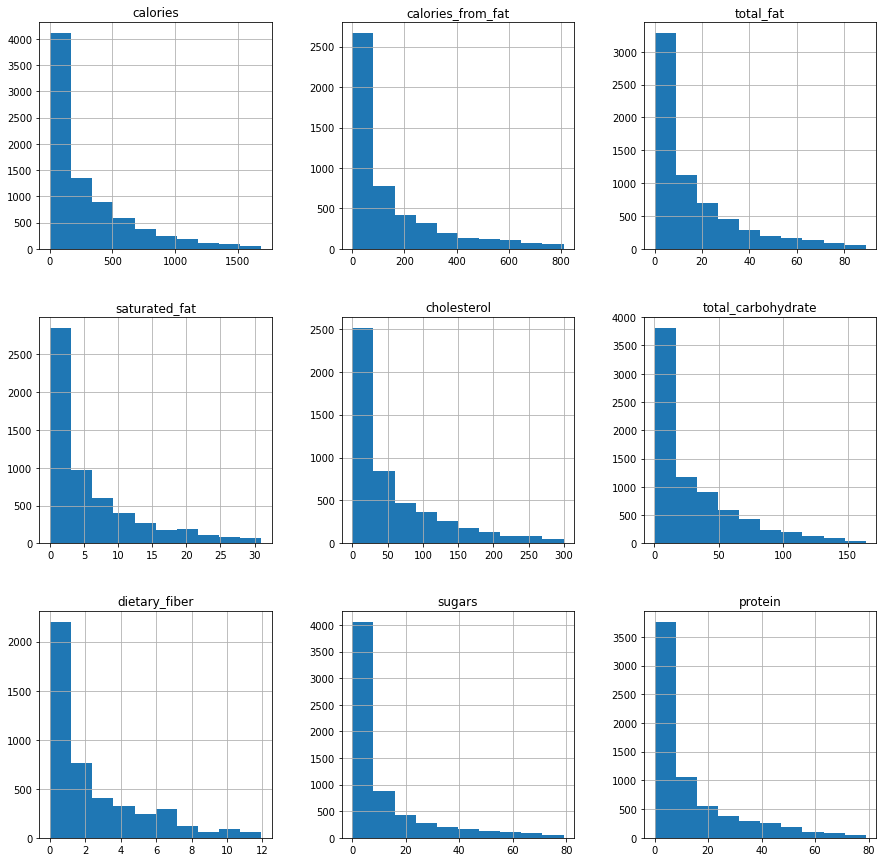

In [23]:
clean_edible_df[unit_column].hist(bins=10,figsize=(15,15))
None

array([[<AxesSubplot:title={'center':'dietary_fiber'}>]], dtype=object)

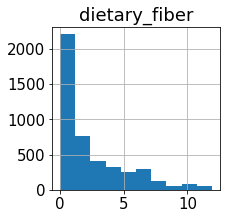

In [76]:
clean_edible_df[['dietary_fiber']].hist(bins=10,figsize=(3,3))

# Get Input From Experts

In [24]:
a=0

# After Input From Experts

In [25]:
a=0

In [26]:
clean_edible_df['available_carbs'] = clean_edible_df['total_carbohydrate'] - clean_edible_df['dietary_fiber']
clean_edible_df['total_macro_wt'] = clean_edible_df['total_carbohydrate'] + clean_edible_df['total_fat'] + clean_edible_df['protein']

clean_edible_df['perc_available_carbs'] = clean_edible_df['available_carbs']/clean_edible_df['total_macro_wt']
clean_edible_df['perc_carbs'] = clean_edible_df['total_carbohydrate']/clean_edible_df['total_macro_wt']
clean_edible_df['perc_fat'] = clean_edible_df['total_fat']/clean_edible_df['total_macro_wt']
clean_edible_df['perc_protein'] = clean_edible_df['protein']/clean_edible_df['total_macro_wt']
clean_edible_df['perc_sugars'] = clean_edible_df['sugars'] / clean_edible_df['total_macro_wt']


info_columns=['available_carbs','total_macro_wt','perc_available_carbs','perc_carbs','perc_fat','perc_protein','perc_sugars']

In [27]:
clean_edible_df['available_carbs'] .describe()

count    4472.000000
mean       31.686013
std        32.547892
min        -6.000000
25%         4.800000
50%        22.000000
75%        49.000000
max       161.000000
Name: available_carbs, dtype: float64

### Create Filters Based on Expert Input

In [28]:
calories_filter = (clean_edible_df ['calories'] >=100) & (clean_edible_df ['calories'] <=500)

carbs_filter= (clean_edible_df ['available_carbs'] >=0) & (clean_edible_df ['available_carbs'] <=15)  & (clean_edible_df ['sugars'] <=15)


In [29]:
stage1_choices=clean_edible_df[calories_filter&carbs_filter].reset_index(drop=True)

In [61]:
stage1_choices[unit_column+ info_columns].describe()

,calories,calories_from_fat,total_fat,saturated_fat,cholesterol,total_carbohydrate,dietary_fiber,sugars,protein,available_carbs,total_macro_wt,perc_available_carbs,perc_carbs,perc_fat,perc_protein,perc_sugars
count,347.0,266.00,341.00,327.00,273.00,347.00,347.00,347.00,345.00,347.00,339.00,339.00,339.00,339.00,339.00,3.39e+02
mean,215.8,121.39,13.81,4.67,50.59,11.12,2.27,3.56,12.44,8.85,37.41,0.28,0.34,0.37,0.29,1.07e-01
std,105.7,77.76,8.82,3.71,51.33,5.04,1.96,2.97,11.94,4.41,17.32,0.18,0.19,0.16,0.18,1.03e-01
min,100.0,15.00,2.00,0.50,0.42,0.49,0.03,0.04,0.33,0.00,14.00,0.00,0.01,0.06,0.02,2.15e-03
25%,130.0,60.00,7.00,2.00,15.00,7.00,1.00,1.00,4.00,5.00,24.00,0.12,0.18,0.25,0.14,4.08e-02
50%,180.0,100.00,11.00,3.50,30.00,12.00,2.00,2.00,8.00,9.00,32.00,0.25,0.32,0.35,0.26,7.27e-02
75%,270.0,168.91,19.00,6.00,75.00,15.00,3.00,5.00,18.00,13.00,48.00,0.42,0.48,0.48,0.40,1.25e-01
max,500.0,350.00,41.00,22.22,295.00,25.00,11.00,14.00,62.00,15.00,94.00,0.71,0.74,0.88,0.80,5.60e-01


In [31]:
stage1_choices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   calories              347 non-null    float64
 1   calories_from_fat     266 non-null    float64
 2   total_fat             341 non-null    float64
 3   saturated_fat         327 non-null    float64
 4   cholesterol           273 non-null    float64
 5   total_carbohydrate    347 non-null    float64
 6   dietary_fiber         347 non-null    float64
 7   sugars                347 non-null    float64
 8   protein               345 non-null    float64
 9   item_id               347 non-null    object 
 10  item_name             347 non-null    object 
 11  brand_name            347 non-null    object 
 12  available_carbs       347 non-null    float64
 13  total_macro_wt        339 non-null    float64
 14  perc_available_carbs  339 non-null    float64
 15  perc_carbs            3

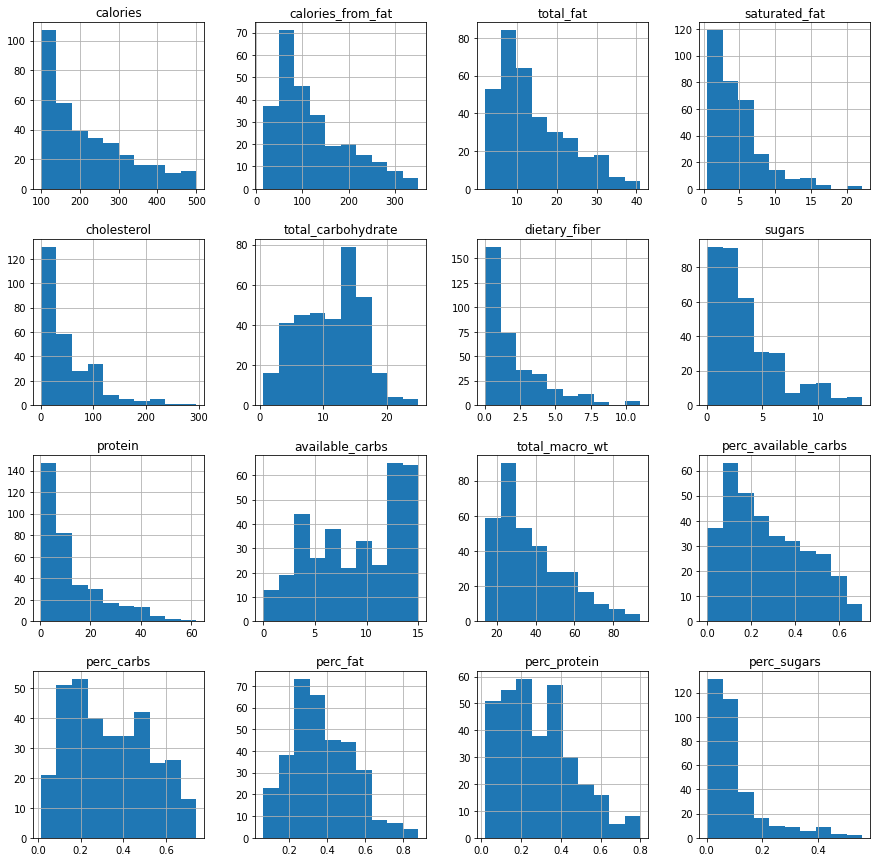

In [32]:
stage1_choices[unit_column+ info_columns].hist(bins=10,figsize=(15,15))
None

In [33]:
diet_candidates = list(stage1_choices.item_name)
diet_candidates

['Cranberry & Goat Cheese Chicken Breasts',
 'Zesty Lemon Crisp Protein Bars',
 'Plant-Based Protein Cookie',
 'Japanese Corn Potage - 1 cup',
 'Vegetarian Schnitzel - 1 piece',
 'Original Hommus',
 'Mini Almond Ice Cream Bars',
 'Peas & Diced Carrots',
 'Mint Chocolate Crisp Protein Bar',
 'Creamy Chocolate Fudge Clean Protein Shake',
 'Sweet & Sour Chicken Breast Toppers',
 'No Salt Added Mixed Vegetables',
 'Dairy Free  Keto White Chocolate Bar',
 'Organic Greek Style Salad With Chicken',
 'Peanut Butter Cookie Nibbler',
 'Buffalo Chicken Pizza, Small - Thin Slice',
 'Sliced Almonds, 10 inch Pizza',
 'Cooked Broad Beans',
 'Chocolate Chip Cookie Dough Plant-Based Keto Bar',
 'Chai The Whole Body Meal',
 'Gluten Free Almond Biscotti',
 'Triple Zero Mixed Berry Blended Greek Yogurt Cups',
 'White Cheddar and Poblano Soup',
 "Future Chick'n",
 'Loads of Asiago & Kale Fully Cooked Smoked Sausages',
 'Italian Sausage & Peppers',
 'Classic Greek Salad',
 'Sour Cream & Onion Crunchions',
 

In [34]:
print("Total number of items that match the criteria: ",len(diet_candidates))

Total number of items that match the criteria:  347


# Natural Language Analysis: Food Frequency

In [35]:
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.corpus import wordnet as wn

### Remove non-alphabetic data

In [36]:

select_diet_words = [word_tokenize(x) for x in diet_candidates]
select_diet_words = sum(select_diet_words,[])


cleaned_diet_words = [word.lower() for word in select_diet_words if word.isalpha()] # Removing non alphabetic data




### Word count after retaining alphabetic data

In [37]:
pd.DataFrame(pd.Series(cleaned_diet_words).value_counts().iloc[:10],columns=['word appearance'])

,word appearance
salad,82
with,48
chicken,46
pizza,29
cheese,29
inch,25
dressing,21
wrap,18
caesar,17
grilled,17


### Getting food specific data

In [38]:
food = wn.synset('food.n.02')
food_list = list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))

filtered_food_list = [ x for x in cleaned_diet_words if x in food_list]

/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packages/nltk/corpus/reader/wordnet.py:579: UserWarning: Discarded redundant search for Synset('lunch_meat.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packages/nltk/corpus/reader/wordnet.py:579: UserWarning: Discarded redundant search for Synset('headcheese.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packages/nltk/corpus/reader/wordnet.py:579: UserWarning: Discarded redundant search for Synset('haslet.n.01') at depth 3
  for synset in acyclic_breadth_first(self, rel, depth):
/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packages/nltk/corpus/reader/wordnet.py:579: UserWarning: Discarded redundant search for Synset('leg_of_lamb.n.01') at depth 5
  for synset in acyclic_breadth_first(self, rel, depth):
/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packa

In [39]:
pd.DataFrame(pd.Series(filtered_food_list).value_counts().iloc[:10],columns=['word appearance'])

,word appearance
chicken,46
cheese,29
chocolate,13
lettuce,11
side,8
sausage,8
butter,8
turkey,7
avocado,7
bacon,7


# Clustering Similar Foods

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

### Checking for correlation in features

In [62]:
info_columns+['calories']

['available_carbs',
 'total_macro_wt',
 'perc_available_carbs',
 'perc_carbs',
 'perc_fat',
 'perc_protein',
 'perc_sugars',
 'calories']

In [41]:
pd.set_option("display.precision", 2)

np.round(np.abs(stage1_choices[info_columns+['calories']].corr()),2).style.background_gradient(cmap='Blues_r')


,available_carbs,total_macro_wt,perc_available_carbs,perc_carbs,perc_fat,perc_protein,perc_sugars,calories
available_carbs,1.00,0.04,0.77,0.74,0.48,0.33,0.35,0.10
total_macro_wt,0.04,1.00,0.52,0.52,0.01,0.55,0.26,0.95
perc_available_carbs,0.77,0.52,1.00,0.96,0.46,0.58,0.49,0.59
perc_carbs,0.74,0.52,0.96,1.00,0.49,0.59,0.50,0.60
perc_fat,0.48,0.01,0.46,0.49,1.00,0.41,0.13,0.26
perc_protein,0.33,0.55,0.58,0.59,0.41,1.00,0.40,0.39
perc_sugars,0.35,0.26,0.49,0.50,0.13,0.40,1.00,0.27
calories,0.10,0.95,0.59,0.60,0.26,0.39,0.27,1.00


In [42]:
least_corr_vals = np.abs(stage1_choices[info_columns].corr()).median().median()
least_corr_vals

0.5192127587670549

### Selecting Features

In [43]:
clustering_dims = ['calories', 'perc_available_carbs', 'perc_fat', 'perc_protein', 'perc_sugars']
print(clustering_dims)

['calories', 'perc_available_carbs', 'perc_fat', 'perc_protein', 'perc_sugars']


### Standardizing Data

In [44]:

input_matrix = stage1_choices[clustering_dims].dropna()
input_scaler = MinMaxScaler((0,1))
scaled_input_matrix = input_scaler.fit_transform(input_matrix)

In [45]:
input_matrix.describe()

,calories,perc_available_carbs,perc_fat,perc_protein,perc_sugars
count,339.00,339.00,339.00,339.00,3.39e+02
mean,217.50,0.28,0.37,0.29,1.07e-01
std,105.89,0.18,0.16,0.18,1.03e-01
min,100.00,0.00,0.06,0.02,2.15e-03
25%,130.00,0.12,0.25,0.14,4.08e-02
50%,180.00,0.25,0.35,0.26,7.27e-02
75%,270.00,0.42,0.48,0.40,1.25e-01
max,500.00,0.71,0.88,0.80,5.60e-01


In [46]:
pd.DataFrame(scaled_input_matrix,columns=input_matrix.columns).describe()

,calories,perc_available_carbs,perc_fat,perc_protein,perc_sugars
count,339.00,339.00,339.00,339.00,339.00
mean,0.29,0.39,0.38,0.35,0.19
std,0.26,0.25,0.20,0.23,0.19
min,0.00,0.00,0.00,0.00,0.00
25%,0.08,0.17,0.24,0.15,0.07
50%,0.20,0.35,0.35,0.31,0.13
75%,0.43,0.59,0.51,0.49,0.22
max,1.00,1.00,1.00,1.00,1.00


In [47]:
input_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 346
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   calories              339 non-null    float64
 1   perc_available_carbs  339 non-null    float64
 2   perc_fat              339 non-null    float64
 3   perc_protein          339 non-null    float64
 4   perc_sugars           339 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB


### Clustering Hyperparam Selection

In [48]:
hyper_param_dict = []
for dist in np.arange(0.01,1,0.01):
    for min_samp in np.arange(5,15,1):
        dbscan_model = DBSCAN(eps=dist,min_samples=min_samp)
        predicted_values=pd.Series(dbscan_model.fit_predict(scaled_input_matrix))
        predicted_values=predicted_values[predicted_values!=-1]
        if len(predicted_values):
            clustered_points = predicted_values.count()
            max_num_clusters = predicted_values.nunique()
            variance = predicted_values.value_counts().std()
            single_clusterness = predicted_values.value_counts().max() - predicted_values.value_counts().median()
            
        else:
            clustered_points=0
            max_num_clusters=0
            variance = np.nan
            single_clusterness =np.nan

        temp_dict = {'epsilon':dist,'min_samples':min_samp,'clustered_points':clustered_points,'max_num_clusters':max_num_clusters,'variance':variance,'single_clusterness':single_clusterness }
        hyper_param_dict.append(temp_dict)
    
hyper_param_df= pd.DataFrame(hyper_param_dict)

In [49]:
hyper_param_df[hyper_param_df.clustered_points>hyper_param_df.clustered_points.max()/3][(hyper_param_df.max_num_clusters>=4)].sort_values('clustered_points')

/home/venkat/miniconda3/envs/tf_24/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,epsilon,min_samples,clustered_points,max_num_clusters,variance,single_clusterness
132,0.14,7,119,7,19.10,50.0
143,0.15,8,120,5,29.68,66.0
155,0.16,10,129,5,37.20,82.0
120,0.13,5,142,13,12.82,46.0
165,0.17,10,154,4,48.45,94.5
154,0.16,9,154,4,46.03,88.0
131,0.14,6,157,11,15.59,50.0
142,0.15,7,165,8,29.55,83.0
153,0.16,8,176,6,39.13,93.0
164,0.17,9,178,4,50.72,96.5


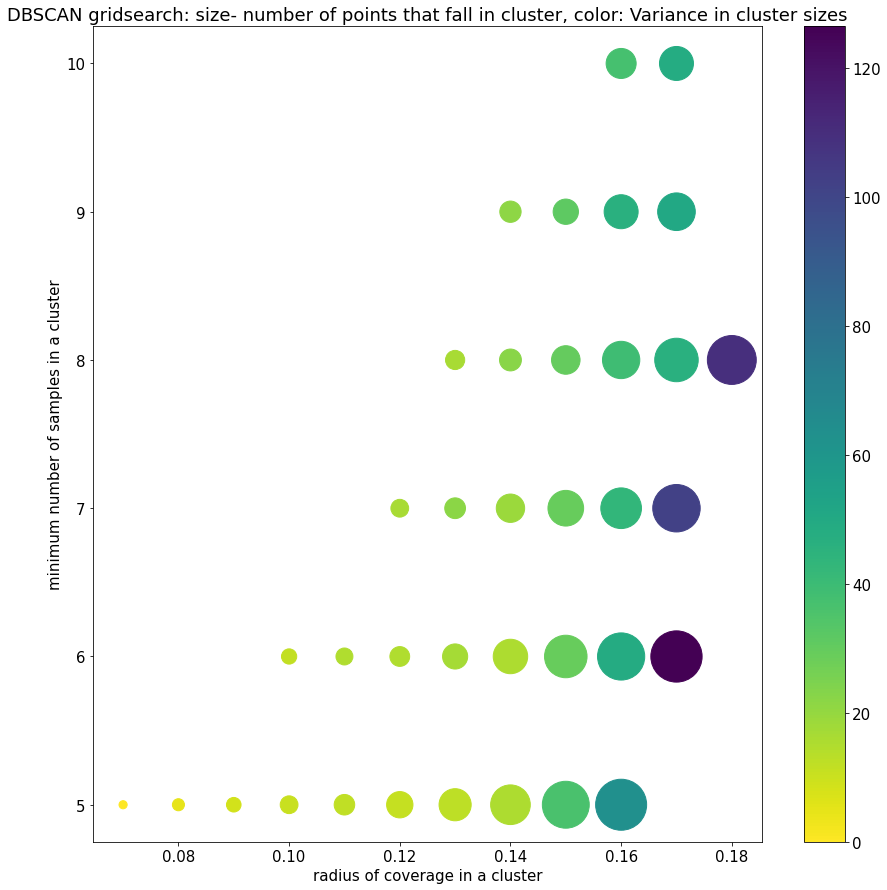

In [65]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=15)
plt.figure(figsize=(15,15))
xseries=hyper_param_df[hyper_param_df.max_num_clusters>=4].epsilon
yseries=hyper_param_df[hyper_param_df.max_num_clusters>=4].min_samples
size=(hyper_param_df[hyper_param_df.max_num_clusters>=4].clustered_points)**1.4
color= hyper_param_df[hyper_param_df.max_num_clusters>=4].variance
plt.scatter(xseries,yseries,s=size,c=color,cmap='viridis_r')
plt.xlabel('radius of coverage in a cluster')
plt.ylabel('minimum number of samples in a cluster')
plt.title('DBSCAN gridsearch: size- number of points that fall in cluster, color: Variance in cluster sizes')
plt.colorbar()

### Clustering using selected model hyperparameters

In [51]:
select_min_samples = 5

select_epsilon = 0.14

select_dbscan_model = DBSCAN(eps=select_epsilon,min_samples=select_min_samples)
select_predicted_values=pd.Series(select_dbscan_model.fit_predict(scaled_input_matrix))
stage1_choices['cluster'] = select_predicted_values

In [72]:
stage1_choices['cluster'].value_counts()

-1.0     147
 0.0      63
 1.0      29
 3.0      15
 5.0      14
 6.0      13
 2.0      11
 4.0       8
 11.0      7
 8.0       6
 10.0      6
 13.0      5
 9.0       5
 12.0      5
 7.0       5
Name: cluster, dtype: int64

In [71]:
# Number of points in each cluster
pd.DataFrame(stage1_choices['cluster'].value_counts().values,columns=['item_count']).iloc[1:]

,item_count
1,63
2,29
3,15
4,14
5,13
6,11
7,8
8,7
9,6
10,6


In [53]:
list(stage1_choices[stage1_choices['cluster']==0]['item_name'].values)

['Plant-Based Protein Cookie',
 'Creamy Chocolate Fudge Clean Protein Shake',
 'Organic Greek Style Salad With Chicken',
 'Buffalo Chicken Pizza, Small - Thin Slice',
 "Future Chick'n",
 'Loads of Asiago & Kale Fully Cooked Smoked Sausages',
 'Snickerdoodle Soft-Baked Cookies',
 'Ghost Pepper Flavored Almonds',
 'Plant-Based Protein, Pumpkin Apple, Red Apple with Cinnamon',
 'Serious Cheese Pizza, 14 inch Famous Thin',
 'Pick 5 - Bacon Cheese Krystal',
 'Caesar Salad, Mexican Style',
 'Pick 2, Grilled Shrimp Salad, Small',
 'Sandwiches & More, Add Half Caesar Salad',
 'Classic Trio Pizza, 12 inch Thick',
 'Defender Pizza, Gluten Free',
 'Gluten Sensitive Spinach, Chicken and Avocado Salad, Half',
 'Kids Pizza with Pow, 1 Topping with Provolone Cheese (1 Slice)',
 'Garden Salad with Blue Cheese Dressing',
 'Craft Your Own Mac and Cheese, Add Peppered Bacon',
 'Stir-Fry Chicken',
 'Salad, Caesar, Small',
 'Croissant',
 'Works Pizza, Small - Thin Slice',
 'Five Grilled Shrimp (Regional)',

In [54]:
list(stage1_choices[stage1_choices['cluster']==1]['item_name'].values)

['Vegetarian Schnitzel - 1 piece',
 'Blackened Voodoo Flavorcoat',
 'Combination Salad',
 'Stir-Fry Smoked Sausage',
 'Heirloom Tomato + Burrata Salad',
 'Vegan Field Greens Salad',
 'House Salad',
 'Snap Peas, Side',
 "Rico's Dip (no chips)",
 'Charbroiled Chicken Salad',
 '35, BBQ Chicken & Provolone Cheese, 8 Inch, Lettuce Wrap',
 'Fajitas, Add White Queso & Pico de Gallo',
 '31, French Dip & Jack Cheese, 6 Inch, Lettuce Wrap',
 'Cheese, pasteurized process, pimento - 1 cup, shredded',
 'Chicken Tortilla Soup',
 'Garden Salad',
 'Sandwiches, #16, Unwich',
 'Lettuce Turkey with Provolone Cheese & Chesapeake Sauce',
 'Babyfood, dinner, chicken stew, toddler - 1 jar',
 'Mahi Mahi',
 'Mini Tuscan Roma Pizza Slice',
 'Pastry, Chocolate Croissant, Select Locations',
 'Salad, Chicken Caesar Salad, Small',
 "Lay's BBQ Chips",
 'Coconut + Lemon Bites',
 'Italian Wings, 12 Count',
 "Colossal Cookies, Peanut Butter Supreme with Mini Reese's",
 'Two Eggs Any Style',
 'Mini Carrot Cupcakes']

In [55]:
list(stage1_choices[stage1_choices['cluster']==2]['item_name'].values)

['Dairy Free  Keto White Chocolate Bar',
 'Dessert, Cheesecake',
 "Old Timer's Breakfast, Two Eggs & Grits",
 'Cinnamon Muffin (Main Street Gourmet)',
 'Small Toss Salad, with Cheese',
 'LOMA LINDA Swiss Stake with Gravy, canned, unprepared - 1 piece',
 'Classy Cobb Salad (no dressing)',
 'Veggie Cole Turkey, 5 inch',
 'Cole Turkey, 10 inch',
 'Add Dairi-O Way to Chicken Souvlaki Pita',
 'Chicago Thin Porchetta & Arugula Cauliflower Crust Pizza, Individual']

In [56]:
list(stage1_choices[stage1_choices['cluster']==3]['item_name'].values)

['Peanut Butter Cookie Nibbler',
 'Chocolate Chip Cookie Dough Plant-Based Keto Bar',
 'Cold Water Lobster Tails (1 Tail, with Butter)',
 'Sausage Pizza, Gluten Free',
 'Huevos Rancheros, Mini',
 'Garage Salad, Serves 4-6 (1 serving) with Dressing Choice Balsamic Vinaigrette',
 'Wedge Salad',
 'Classic Caesar Salad, Full Portion Dressing',
 'Loop N Cheese Burger, Without Bun',
 'Fried Chicken Salad with Grape Tomatoes',
 'Classic Caesar Salad, No Dressing',
 'Meatball With Sauce And Cheese',
 "Scratch Batter Child's Cone Dipped Dark Chocolate",
 'Classic Tuesday Items - Soup and Salad, House Salad',
 'Party Platter, Ancho Chile Ranch Dressing']

In [57]:
list(stage1_choices[stage1_choices['cluster']==4]['item_name'].values)

['Japanese Corn Potage - 1 cup',
 'Tomato & Basil Pasta Sauce',
 'Cheesesticks, 12 inch',
 'Sausage & Apple Pizza on Cauliflower Crust, 12 inch',
 'BBQ Ribs, 1/2 Rack with Guava BBQ Sauce',
 '45, BBQ Tri-Tip, 8 Inch, Lettuce Wrap',
 'Apple Turnover',
 'Snacks, corn-based, extruded, puffs or twists, cheese-flavor, unenriched - 1 oz']

In [58]:
list(stage1_choices[stage1_choices['cluster']==5]['item_name'].values)

['Italian 5 Grain Bread',
 'Iso Poofs High Protein Cereal',
 'Clam Chowder New England, Bowl',
 'Cobb Salad - Entree',
 'Garage Salad, Serves 10-15 (1 serving) with Dressing Choice Northern Italian',
 'Fried Chicken Finger Wrap with Jack Cheddar Cheese Mix',
 'JR Club House Salad',
 'Cobb Salad',
 'French Onion Soup',
 'Veggie Chili, Cup',
 'Blueberry Muffin - 1 oz',
 'Add Deluxe',
 'Pick 5 - Classic Pup',
 'Trail Mix Cookies']